In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/model_hack1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')




In [4]:
from sklearn.impute import SimpleImputer

# Filter data for the machine with the greatest number of records (machine_id = 19 in this case)
machine_df = df[df['machine_id'] == 19]

# Prepare the data by selecting relevant columns without dropping missing values
model_data = machine_df[['ing_1_id', 'ing_2_id', 'ing_3_id', 'result']]

# Impute missing values in features (ing_1_id, ing_2_id, ing_3_id) with the mean of the columns
imputer = SimpleImputer(strategy='mean')
X = model_data[['ing_1_id', 'ing_2_id', 'ing_3_id']]
X_imputed = imputer.fit_transform(X)



Missing values in 'result': 12

Summary statistics for 'result':
count     176.000000
mean     5086.240057
std      2024.147208
min      1822.540000
25%      2949.540000
50%      5096.750000
75%      7232.847500
max      7835.670000
Name: result, dtype: float64


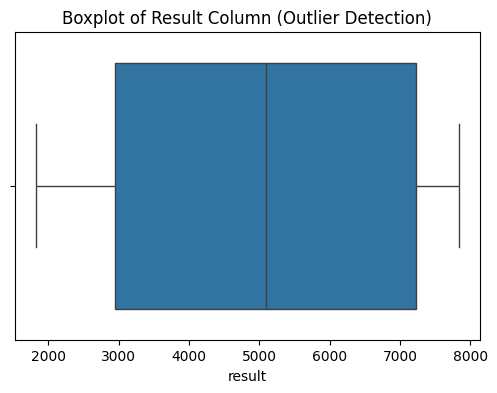

In [18]:
#analysing the result column


# Check for missing values in the 'result' column
missing_values = model_data['result'].isnull().sum()
print(f"Missing values in 'result': {missing_values}")

# Display summary statistics for the 'result' column
result_summary = model_data['result'].describe()
print("\nSummary statistics for 'result':")
print(result_summary)

# Plot a boxplot to check for outliers in the 'result' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=model_data['result'])
plt.title('Boxplot of Result Column (Outlier Detection)')
plt.show()

In [24]:
#imputing with mean as the data is not skwed

# Impute missing values in the 'result' column with the mean
imputer_mean = SimpleImputer(strategy='mean')
model_data['result'] = imputer_mean.fit_transform(model_data[['result']])

# Check for missing values after imputation
missing_values_after = model_data['result_imputed_mean'].isnull().sum()
print(f"Missing values in 'result' after imputation with mean: {missing_values_after}")

# Display summary statistics after imputation
print("\nSummary statistics for 'result' after mean imputation:")
print(model_data['result_imputed_mean'].describe())

Missing values in 'result' after imputation with mean: 0

Summary statistics for 'result' after mean imputation:
count     188.000000
mean     5086.240057
std      1958.124561
min      1822.540000
25%      3026.037500
50%      5086.240057
75%      7189.457500
max      7835.670000
Name: result_imputed_mean, dtype: float64


<ipython-input-24-f86d6708fcd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['result'] = imputer_mean.fit_transform(model_data[['result']])


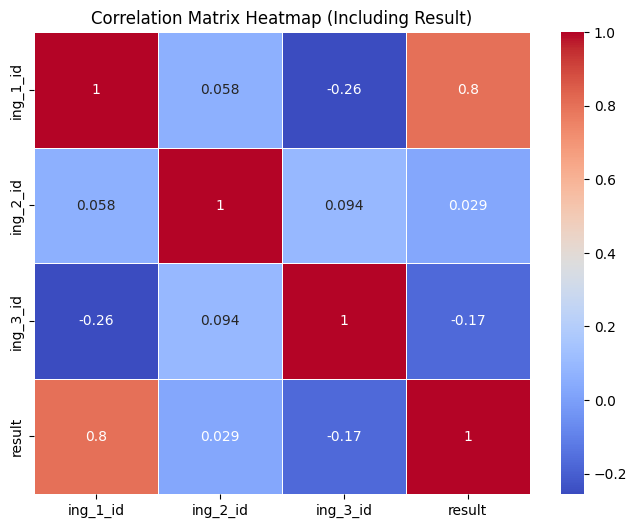

In [25]:
# Separate features (X) and target (y)
X = model_data[['ing_1_id', 'ing_2_id', 'ing_3_id']]  # Features
y = model_data['result']  # Target

# Impute missing values in features with the mean of the columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert the imputed NumPy array back into a pandas DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=['ing_1_id', 'ing_2_id', 'ing_3_id'])

# Add the 'result' column back to the imputed DataFrame
X_imputed_df['result'] = y.values

# Compute the correlation matrix, including the 'result' column
correlation_matrix = X_imputed_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Including Result)')
plt.show()

analysis:
The result i.e viscosity is higher(pos correlation) for sample group 1 ie it has liquids like almod oi, jojoba oil, gum, vit e, cetyl alcohol


The result i.e viscosity is higher(negative correlation) for sample group 3 ie it has liquids like vit e ,glyceryn



In [26]:
# Sort the DataFrame by 'result' in descending order
sorted_df = X_imputed_df.sort_values(by='result', ascending=False)

# Display the top 3 rows
top_3_rows = sorted_df.head(3)
print("Top 3 rows by result:")
print(top_3_rows)

# Display the bottom 3 rows
bottom_3_rows = sorted_df.tail(3)
print("\nBottom 3 rows by result:")
print(bottom_3_rows)

Top 3 rows by result:
     ing_1_id  ing_2_id  ing_3_id   result
161  4.544379  2.387324  4.454545  7835.67
68   7.000000  2.000000  4.000000  7806.24
85   7.000000  2.000000  5.000000  7790.07

Bottom 3 rows by result:
     ing_1_id  ing_2_id  ing_3_id   result
177       0.0       2.0       5.0  1830.94
185       0.0       2.0       5.0  1825.30
126       0.0       2.0       5.0  1822.54


<ipython-input-29-1af1afdd3cc9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combinations, y=viscosity_values, palette='coolwarm')


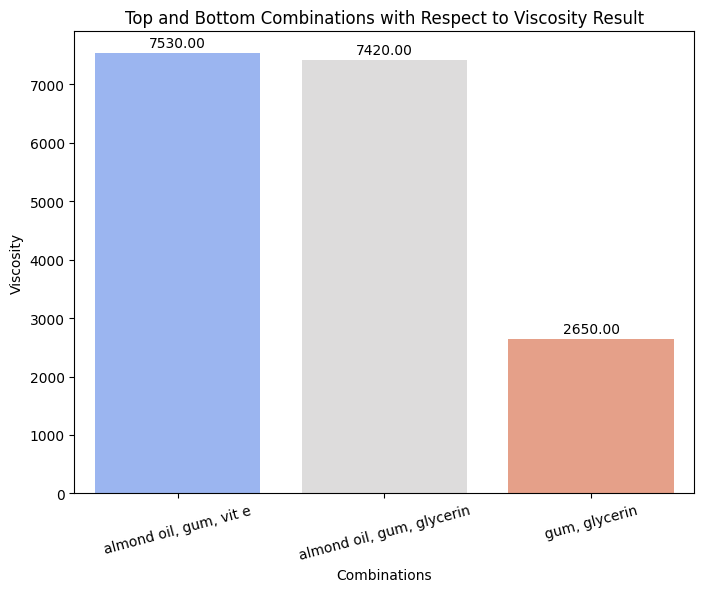

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for top and bottom combinations using ingredient names
combinations = ['almond oil, gum, vit e', 'almond oil, gum, glycerin', 'gum, glycerin']
# Replace these with actual viscosity values
viscosity_values = [7530.0, 7420.0, 2650.0]  # Example values for high and low viscosity

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=combinations, y=viscosity_values, palette='coolwarm')

# Annotate the bars with viscosity values
for i, v in enumerate(viscosity_values):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', va='bottom')  # Adjusted the offset for better visibility

plt.title('Top and Bottom Combinations with Respect to Viscosity Result')
plt.xlabel('Combinations')
plt.ylabel('Viscosity')

plt.xticks(rotation=15)  # Rotate the labels for better readability
plt.show()



We have tried to show the top 3 and bottom 3 comninations of samples wrt to the viscosity result and dound out that combinations with 7,2,4 and 7,2,5 have higher viscosity

and the combinations 2,5 have hower viscosity .

In [ ]:
# Target variable (result) remains the same
y = model_data['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R² Score: {r2_gb}")


Gradient Boosting Mean Squared Error: 896819.7755695501
Gradient Boosting R² Score: 0.7536955095445868


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_gb = gb_model.predict(X_train)

# Make predictions on the test data
y_test_pred_gb = gb_model.predict(X_test)

# Evaluation metrics for training data (Gradient Boosting)
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)

print("Gradient Boosting - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_train_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_gb}")
print(f"R² Score: {r2_train_gb}")
print(f"Mean Absolute Error (MAE): {mae_train_gb}\n")

# Evaluation metrics for test data (Gradient Boosting)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)

print("Gradient Boosting - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_gb}")
print(f"R² Score: {r2_test_gb}")
print(f"Mean Absolute Error (MAE): {mae_test_gb}")


Gradient Boosting - Training Data Evaluation:
Mean Squared Error (MSE): 791525.6803447998
Root Mean Squared Error (RMSE): 889.6772900017173
R² Score: 0.7936758547898641
Mean Absolute Error (MAE): 447.45418473441725

Gradient Boosting - Test Data Evaluation:
Mean Squared Error (MSE): 896819.7755695501
Root Mean Squared Error (RMSE): 947.0056893015744
R² Score: 0.7536955095445868
Mean Absolute Error (MAE): 455.0584699437166


The evaluation results show that your **Gradient Boosting model** performs reasonably well:

- **Training Data:**
  - R²: 79.4% (model explains 79.4% of the variance)
  - RMSE: 889.68 (average error ~889 units)

- **Test Data:**
  - R²: 75.4% (model explains 75.4% of the variance)
  - RMSE: 947.01 (average error ~947 units)

The model generalizes well, with a slight drop in performance on the test set, indicating minimal overfitting.

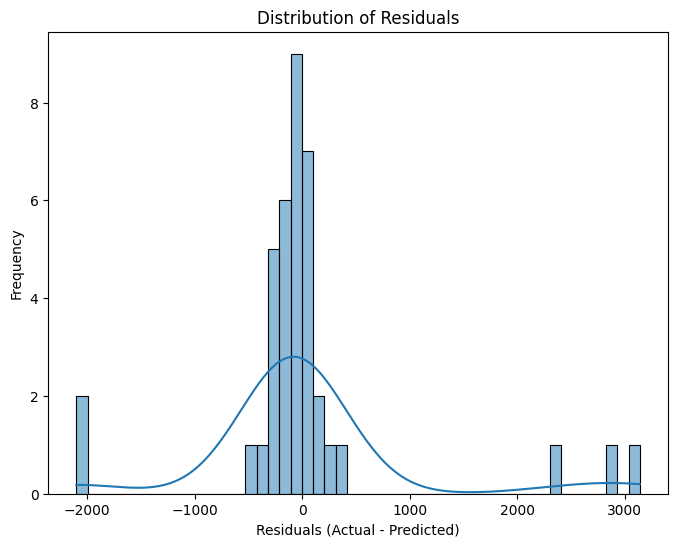

In [36]:
# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


Residuals Centered Around Zero:

The majority of residuals are close to zero, which is a good sign. This means that for most predictions, the model's errors are relatively small.
The peak of the distribution is near zero, suggesting that the model tends to predict values that are close to the actual values.